# Bioinformatics Project - Computational Drug Discovery [Part 4] 

### Regression Models with Random Forest



In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
df = pd.read_csv('Data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [3]:
# remove any rows with missing values
df = df.dropna()

## **3. Input features**


### **3.1. Input features**

In [4]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
278,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
279,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
280,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [5]:
Y = df.pIC50
Y

0      6.602060
1      7.301030
2      4.301030
3      4.000000
4      4.000000
         ...   
277    5.744727
278    5.443697
279    7.301030
280    7.301030
281    7.045757
Name: pIC50, Length: 282, dtype: float64

### **3.3. Let's examine the data dimension**

In [6]:
X.shape

(282, 881)

In [7]:
Y.shape

(282,)

### **3.4. Remove low variance features**

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [9]:
X.shape

(282, 154)

## **4. Data split (80/20 ratio)**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
X_train.shape, Y_train.shape

((225, 154), (225,))

In [12]:
X_test.shape, Y_test.shape

((57, 154), (57,))

## **5. Building a Regression Model using Random Forest**

In [13]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.4998202396116418

In [14]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

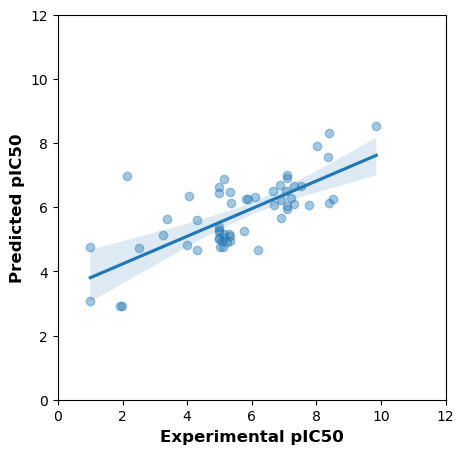

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'Experimental': Y_test, 'Predicted': Y_pred})
ax = sns.regplot(x='Experimental', y='Predicted', data=df, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()